# Análisis de circuito RLC

Sea un circuito que consta de una fuente de voltaje sinusoidal, una resistencia $R$ , un condensador $C$ y un inductor $L$ conectados en serie como el que se muestra en la figura \ref{fig:circuitoRLC}.   

<img src="img/RLCCirc.png" alt="Drawing" style="width: 300px;"/>

Aplicando las ecuaciones de Kirchoff, se puede encontrar la ecuación básica bajo la cual se rije la carga eléctrica $q(t)$, siendo esta: 
\begin{equation}\label{eq:RCsin}
V_0\cos\omega t = V_R + V_L + V_C = R\,i(t) + L\frac{d i(t)}{dt} + \frac{q(t)}{C}
\end{equation}
donde la corriente $i(t)$ y la carga eléctrica $q(t)$ mantienen sus definiciones usuales (i.e. $i=\frac{dq}{dt}$). 

En términos de la carga, esta es una ecuación diferencial lineal de segundo orden y describe un sistema disipativo sometido a oscilaciones forzadas. En general, es de interés estudiar el comportamiento del circuito en régimen permanente (es decir, luego de que está en acción por un largo período de tiempo).

Mediante el análisis fasorial, es posible demostrar que las diferencias de potencial de cada elemento del circuito, se pueden expresar como <<<<<<<<<<<REVISAR 

\begin{equation}\label{eq:fasores}
\hat{V_R} = R\hat{I} \qquad \hat{V_L} = j\omega L \hat{I} \qquad \hat{V_C} = \frac{1}{C}\hat{Q} = \frac{\hat{I}}{j\omega C}
\end{equation}

siendo $\hat{I}$ el fasor corriente eléctrica y $\hat{Q}$ el fasor asociado a la carga eléctrica. A partir de lo anterior, se puede definir la reactancia inductiva como $X_L = \omega L$, y la reactancia capacitiva $X_C = (\omega C)^{-1}$. Análogamente, a través del análisis de las expresiones de $\hat{V_R}$, $\hat{V_L}$ y $\hat{V_C}$ se puede observar que:

- El fasor $\hat{V_R}$ está en fase con la corriente eléctrica.
- La tensión en el inductor ($\hat{V_L}$) se adelanta respecto a la corriente en $\pi/2$.
- La tensión en el capacitor ($\hat{V_C}$) se atrasa respecto a la corriente en $\pi/2$. 

Con todo lo anterior, es posible obtener la amplitud del fasor corriente eléctrica $\hat{I}$ (a partir de la información del circuito y de la fuente) como:

\begin{equation}\label{eq:corriente}
| \hat{I} | = \frac{| \hat{V} |}{\sqrt{R^2+(X_L-X_C)^2}}
\end{equation}

A través de las reactancias, se obtiene además el defasaje $\phi$ existente entre el fasor tensión de la fuente $\hat{V}$ y corriente eléctrica $\hat{I}$:

\begin{equation}\label{eq:phi}
\phi = \tan^{-1} \frac{X_L - X_C}{R}
\end{equation}

Se pueden encontrar tres casos para los valores de $\phi$:

- $\phi = 0 $ : se dice que el circuito está en resonancia y la corriente y el voltaje están en fase.
- $\phi < 0 $ : se dice que el circuito es más capactivo que inductivo, y por lo tanto el voltaje está atrasado con respecto a la corriente.
- $\phi > 0 $ : se dice que el circuito es más inductivo que capactivo, y por lo tanto el voltaje está adelentado con respecto a la corriente.


Observemos el comportamiento de la tensión para cada elemento, de la misma manera que se observaría en un osciloscopio. Comencemos con algunas definiciones básicas de parámetros del circuito, como son los valores de resistencia, capacitancia, impedancia y amplitud y frecuencia de la fuente con que alimentamos el circuito ($V_0$ y $f$, respectivamente). Es posible variar los parámetros del circuito de manera de observar distintos comportamientos del mismo.

In [6]:
# ---- no modificar ----------
import numpy as np
import matplotlib.pyplot as plt
#------------------------------

# Definición valores característicos del circuito (los parámetros a continuación de pueden variar)
R = 1000; # Resistencia en Ohm
C = 150e-6; # Capacitancia en Faradios
L = 15e-3; # Impedancia en Henry
Vo = 5; # Amplitud de la fuente en Volts
f = 1000; # Frecuencia de trabajo en Hertz

Definamos las reactancias para el inductor ($X_L$) y el capacitor ($X_C$). Se debe recordar que la reactancia asociada al resistor es su propia resistencia eléctrica. Una vez definidas las reactancias, se puede obtener la amplitud de la corriente eléctrica.

In [7]:
w = 2*np.pi*f; # Frecuencia angular de trabajo en rad/s

XL = w*L; # Reactancia inductiva
XC = 1/(w*C); # Reactancia capacitiva

Io=Vo/np.sqrt(R**2+(XL-XC)**2); # Amplitud de la corriente eléctrica I

# ------ No modificar ----------
print('Amplitud de la tensión: ' + str(Vo) + ' V')
print('Amplitud de la corriente eléctrica: ' + str(Io) + ' A')
#------------------------------

Amplitud de la tensión: 5 V
Amplitud de la corriente eléctrica: 0.004978430949903084 A


Con lo anterior, se puede hallar el defasaje $\phi$:

In [8]:
phi = np.arctan((XL-XC)/R); # Defasaje entre tensión y corriente del circuito

# ------ No modificar ----------
print('Defasaje (rad): ' + str(phi))
print('Defasaje (grados): ' + str(phi*180/np.pi))
#------------------------------

Defasaje (rad): 0.09291840598021409
Defasaje (grados): 5.323832501749417


Qué observaríamos en el oscilosopio?

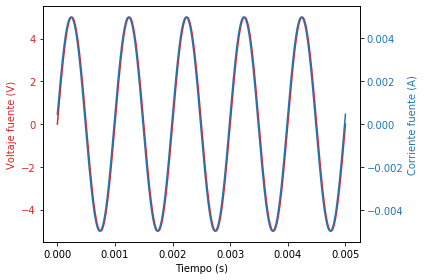

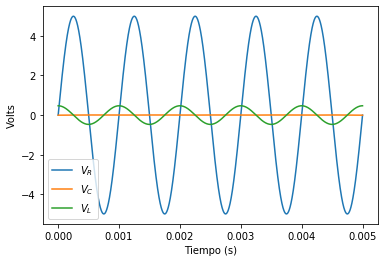

In [9]:
t = np.arange(0,5/f,0.0000001) # Tiempo de observacion del circuito, asumiendo que se llegó al régimen permanente

V = Vo*np.sin(w*t) # Tension que impone la fuente
I = Io*np.sin(w*t+phi) # Corriente del circuito

# Caídas de potencial en cada elemento
VR = R*Io*np.sin(w*t); # caida de tension en R
VC = XC*Io*np.sin(w*t-np.pi/2); # caida de tension en C
VL = XL*Io*np.sin(w*t+np.pi/2); # caida de tension en L

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje fuente (V)', color=color)
ax1.plot(t, V, color=color, label='V')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Corriente fuente (A)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, I, color=color, label='I')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.plot(t,VR,label='$V_R$')
plt.plot(t,VC,label='$V_C$')
plt.plot(t,VL,label='$V_L$')
plt.ylabel('Volts')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

A continuación se encuentra todo el código para poder modificar y probar distintos parámetros del circuito.
Los parámetros a variar se encuentran dentro del bloque PARAMETROS A MODIFICAR que va desde la línea 1 a 8. Para el correcto funcionamiento del script, no modificar nada fuera de dicho bloque.

Amplitud de la tensión: 5 V
Amplitud de la corriente eléctrica: 0.002671422596809633 A
Defasaje (rad): -1.0071352237222084
Defasaje (grados): -57.7045977182465


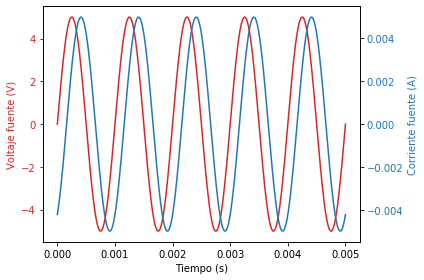

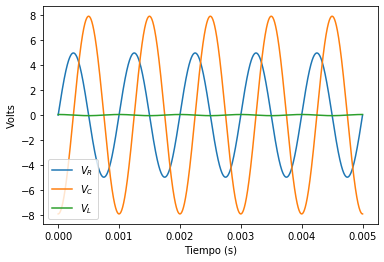

In [10]:
# ------- PARAMETROS A MODIFICAR -----------
# Definición valores característicos del circuito (los parámetros a continuación de pueden variar)
R = 1000; # Resistencia en Ohm
C = 100e-9; # Capacitancia en Faradios
L = 1.5e-3; # Impedancia en mili Henry
V0 = 5; # Amplitud de la fuente en Volts
f = 1000; # Frecuencia de trabajo en Hertz
#-------------------------------------------

# ------ No modificar ----------
# ------ lo que sigue ----------

w = 2*np.pi*f; # Frecuencia angular de trabajo en rad/s

XL = w*L; # Reactancia inductiva
XC = 1/(w*C); # Reactancia capacitiva

I=V0/np.sqrt(R**2+(XL-XC)**2); # Amplitud de la corriente eléctrica I

# ------ No modificar ----------
print('Amplitud de la tensión: ' + str(V0) + ' V')
print('Amplitud de la corriente eléctrica: ' + str(I) + ' A')
#------------------------------

phi = np.arctan((XL-XC)/R); # Defasaje entre tensión y corriente del circuito

# ------ No modificar ----------
print('Defasaje (rad): ' + str(phi))
print('Defasaje (grados): ' + str(phi*180/np.pi))
#------------------------------

t = np.arange(0,5/f,0.0000001) # Tiempo de observacion del circuito, asumiendo que se llegó al régimen permanente

V = Vo*np.sin(w*t) # Tension que impone la fuente
I = Io*np.sin(w*t+phi) # Corriente del circuito

# Caídas de potencial en cada elemento
VR = R*Io*np.sin(w*t); # caida de tension en R
VC = XC*Io*np.sin(w*t-np.pi/2); # caida de tension en C
VL = XL*Io*np.sin(w*t+np.pi/2); # caida de tension en L


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje fuente (V)', color=color)
ax1.plot(t, V, color=color, label='V')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('Corriente fuente (A)', color=color) 
ax2.plot(t, I, color=color, label='I')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

plt.plot(t,VR,label='$V_R$')
plt.plot(t,VC,label='$V_C$')
plt.plot(t,VL,label='$V_L$')
plt.ylabel('Volts')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.show()

# Resonancia
Observemos ahora que sucede al variar las frecuencias de trabajo del sistema (esto puede ser realizado mediante la variación de la frecuencia de la fuente de tensión que alimenta el circuito). 

Frecuencia de resonancia: 410.9362960409999Hz
Hola TANO


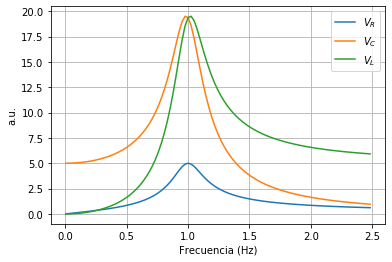

In [12]:
# Definición valores característicos del circuito
R = 1000; # Resistencia en Ohm
C = 100e-9; # Capacitancia en Faradios
L = 1500e-3; # Impedancia en Henry
Vo = 5; # Amplitud de la fuente en Volts

# Frecuencia de resonancia del circuito RLC
wo = 1/np.sqrt(L*C)
print('Frecuencia de resonancia: ' + str(wo/(2*np.pi)) + 'Hz')
print('Hola TANO')

# Frecuencias a estudiar
f = np.arange(1,2.5*wo/(2*np.pi),10) ; #[10:10:1200]; 

# Pasaje a frecuencia angular
w=2*np.pi*f;

XL = w*L; # Reactancia inductiva
XC = 1/(w*C); # Reactancia capacitiva

I=V0/np.sqrt(R**2+(XL-XC)**2); # Amplitud de la corriente eléctrica I

# Tensiones en resistencia, capacitor e inductor
VR=R*I;
VC=I*XC;
VL=XL*I;

plt.plot(w/wo,VR,label='$V_R$')
plt.plot(w/wo,VC,label='$V_C$')
plt.plot(w/wo,VL,label='$V_L$')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('a.u.')
plt.grid()
plt.show()

